#**STOCHASTIC GRADIENT DESCENT METHOD**

# เตรียมสภาพแวดล้อมและข้อมูล

Import Libary

In [ ]:
import tensorflow.compat.v1 as tf
from tensorflow.python.framework.ops import disable_eager_execution

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn import metrics

import plotly
import plotly.graph_objs as go
import plotly.express as px

K = tf.keras.backend

ตั้ง random seed และ epoch

In [ ]:
np.random.seed(seed=13)

EPOCH=500

โหลดไฟล์ csv

In [ ]:
dataset=pd.read_csv('Weather.csv')
dataset.shape

<ipython-input-3-e4ef64a2c4d2>:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv('Weather.csv')


(119040, 31)

เช็คข้อมูล

In [ ]:
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


พล็อตกราฟ MinTemp และ MaxTemp ดูลักษณะข้อมูล

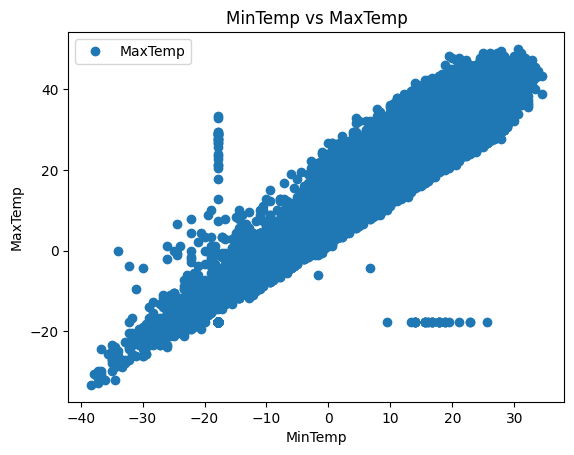

In [ ]:
dataset.plot(x='MinTemp',y='MaxTemp',style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.savefig('min_max_temp.jpeg', dpi=300)

ดูการกระจายตัวของ MaxTemp

<ipython-input-6-876fdbb18738>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seabornInstance.distplot(dataset['MaxTemp'])


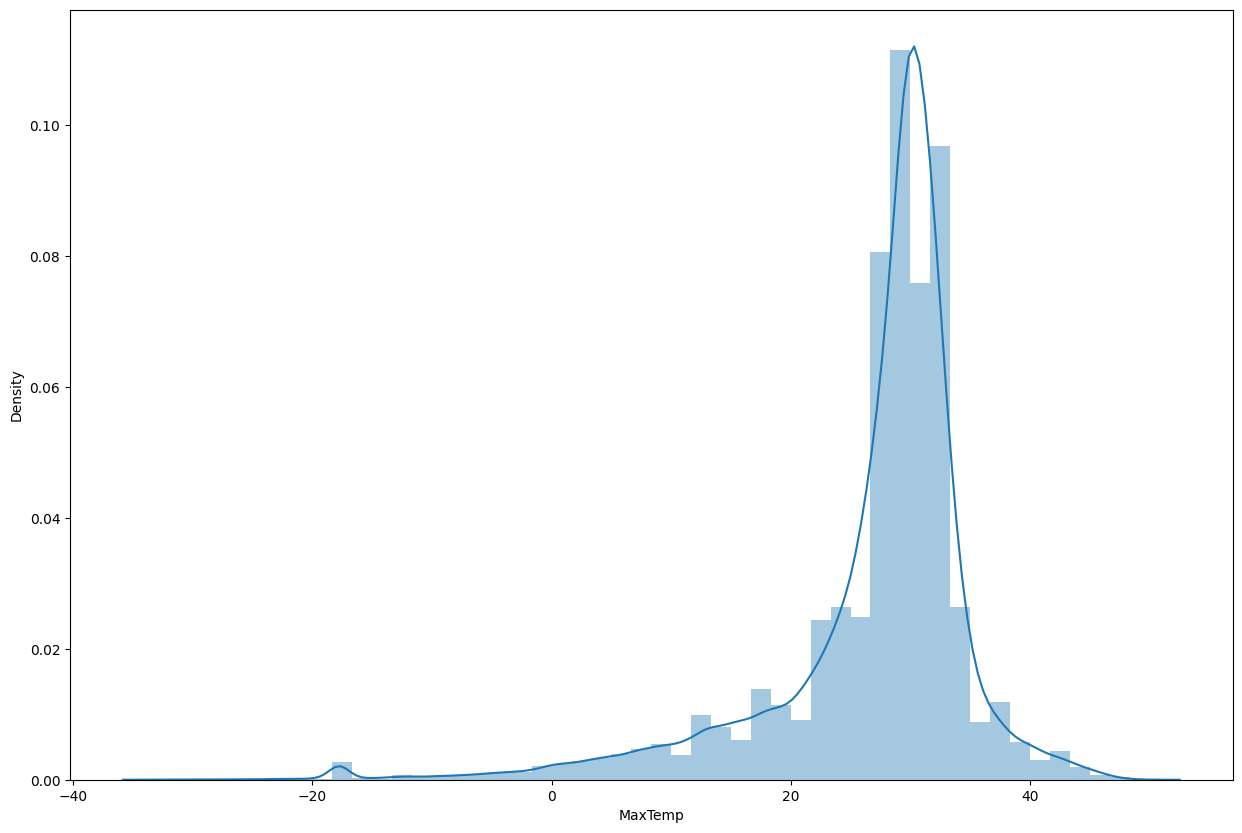

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])
plt.savefig('dis_max_temp.jpeg',dpi=300)

แยกข้อมูลเป็น Input Data(x) และ ผลเฉลย(y)

In [ ]:
x=dataset['MinTemp'].values.reshape(-1,1)
y=dataset['MaxTemp'].values.reshape(-1,1)

x.shape

(119040, 1)

สุ่มแบ่งข้อมูล สำหรับเทรน 80% สำหรับเทส 20%

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((95232, 1), (23808, 1), (95232, 1), (23808, 1))

นิยาม Root Mean Square Error

In [ ]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

# **Batch x_train.shape[0]**

นิยามโมเดล

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1, kernel_initializer='random_uniform', activation='linear'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

คอมไพล์โมเดล

In [ ]:
SGD = tf.keras.optimizers.SGD
sgd = SGD(learning_rate=0.0001)

model.compile(loss='mse', optimizer=sgd, metrics=['mae', 'mse', rmse])

เทรนโมเดล โดยแบ่งข้อมูลสำหรับเทรน 80% และเทส 20% และกำหนดขนาด batch เท่ากับ x_train.shape[0]

In [ ]:
history = model.fit(x_train, y_train, epochs=EPOCH, batch_size=x_train.shape[0],  verbose=1, validation_split=0.2, shuffle=True)

Epoch 1/500
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 61.1582 - mae: 5.5513 - mse: 61.1582 - rmse: 5.5513 - val_loss: 35.7509 - val_mae: 4.4500 - val_mse: 35.7509 - val_rmse: 4.4500
Epoch 2/500
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 35.3594 - mae: 4.4649 - mse: 35.3594 - rmse: 4.4649 - val_loss: 34.2659 - val_mae: 4.3932 - val_mse: 34.2659 - val_rmse: 4.3932
Epoch 3/500
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 33.8139 - mae: 4.3641 - mse: 33.8139 - rmse: 4.3641 - val_loss: 32.8336 - val_mae: 4.2672 - val_mse: 32.8336 - val_rmse: 4.2672
Epoch 4/500
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 32.4905 - mae: 4.2789 - mse: 32.4905 - rmse: 4.2789 - val_loss: 31.5396 - val_mae: 4.1922 - val_mse: 31.5396 - val_rmse: 4.1922
Epoch 5/500
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 31.5299 - mae: 4.2071 - mse: 31.5299 - rmse: 4.2071 - val_loss: 30.3791 - val_mae: 4.1304 - val_mse: 30.3791 - val_rmse: 4.1304
Epoch 6/500
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 5s

พล็อต loss และ validate loss

In [ ]:
h1=go.Scatter(y=history.history['loss'],
                    mode="lines",
                    line=dict(
                    	width=2,
                    	color='blue'),
                    name="loss")

h2=go.Scatter(y=history.history['val_loss'],
                    mode="lines",
                    line=dict(
                    	width=2,
                    	color='green'),
                    name="val_loss")

data=[h1,h2]

layout1=go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1=go.Figure(data, layout=layout1)
plotly.offline.iplot(fig1)

ให้โมเดลที่เทรมมาทำนาย

In [ ]:
y_pred=model.predict(x_test)

744/744 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


แสดงผลการทำนาย

In [ ]:
y_pred = y_pred.flatten()
y_test = y_test.flatten()

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
0,17.777778,21.020771
1,28.333333,26.688044
2,30.555556,31.840111
3,32.222222,30.294491
4,16.666667,13.292673
5,30.555556,34.416145
6,28.888889,30.809696
7,30.555556,31.840111
8,28.888889,32.870522
9,21.666667,27.203253


พล็อตกราฟเปรียบเทียบค่าที่โมเดลทำนายกับค่าจริง

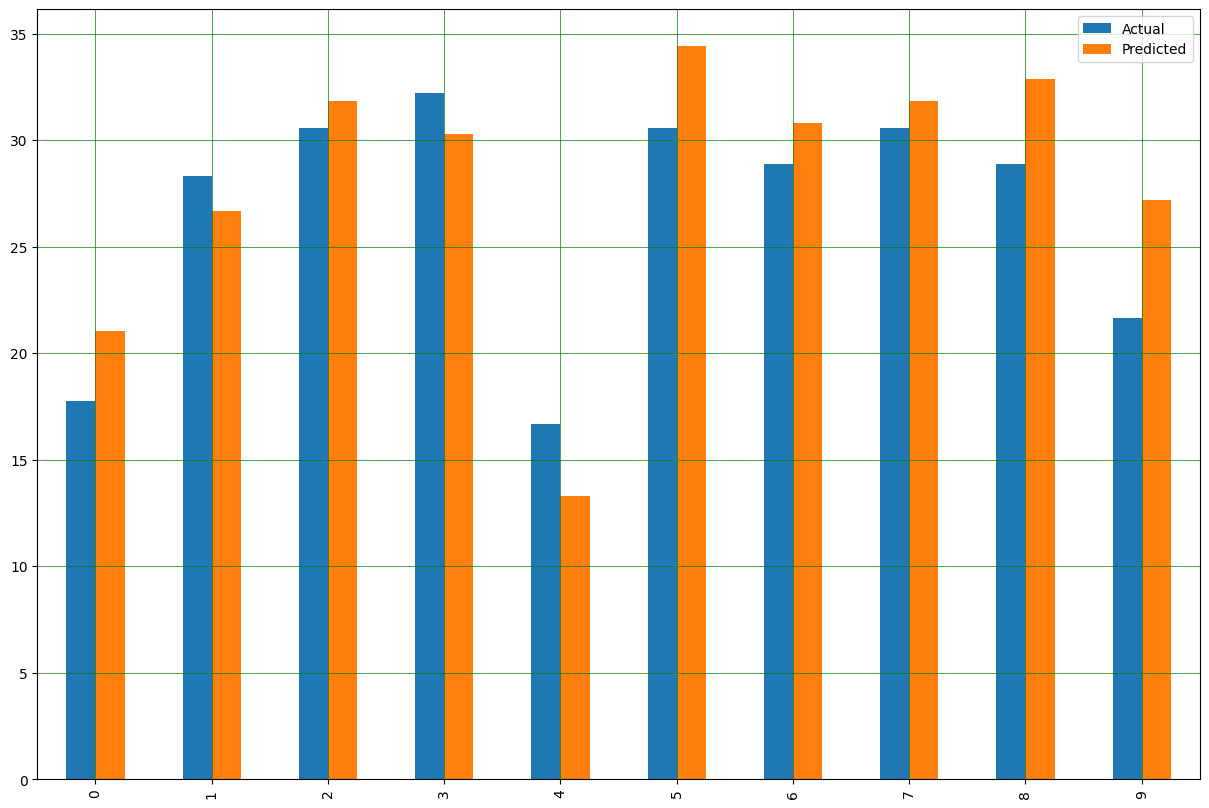

In [ ]:
df1=df.head(10)
df1.plot(kind='bar',figsize=(15,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.savefig('actual-predict2.jpeg',dpi=300)

แสดงโมเดลที่ถูกเทรนใน Epoch สุดท้าย

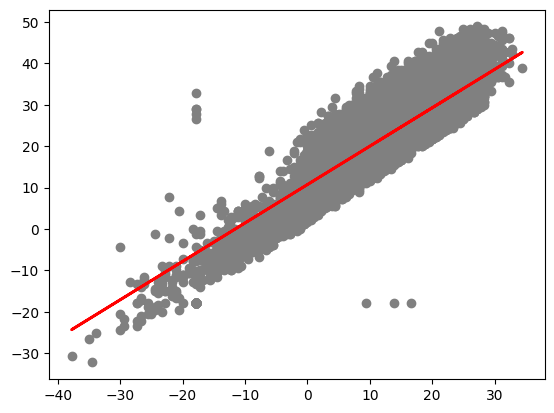

In [ ]:
plt.scatter(x_test,y_test,color='gray')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.savefig('keras_500_model.jpeg',dpi=300)

วัดประสิทธิภาพโมเดลด้วย Mean Absolute Error, Mean Squared Error, Root Mean Squared Error

In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 3.221950325097705
Mean Squared Error: 17.256667670267337
Root Mean Squared Error: 4.154114547080682
